In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import ceil, floor, pow, log

%matplotlib notebook

In [2]:
img_path = 'thai.jpg'

shape (767, 1024)
dtype uint8
image statistics


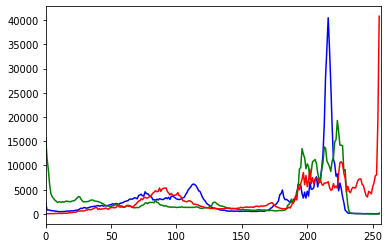

In [3]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


print('shape', img_gray.shape)
print('dtype', img_gray.dtype)

print('image statistics')
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

In [4]:
MAX = int(pow(2,8))
MIN = 0

q_bit = 4
q_level = int(pow(2, q_bit))
q_step = (MAX -MIN)//q_level

print('q_bit', q_bit)
print('q_level', q_level)
print('q_step', q_step)

q_bit 4
q_level 16
q_step 16


In [5]:
img_q4 = np.copy(img_gray)

for x in range(0, img_q4.shape[0]):
    for y in range(0, img_q4.shape[1]):
        Q = floor(img_q4[x,y]/q_step)
        img_q4[x,y] = Q

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7012a26750>,
 <matplotlib.image.AxesImage at 0x7f70129dc590>)

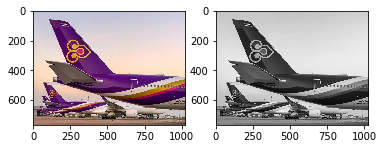

In [6]:
fig1 = plt.figure('Figure 1')
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.subplot(1, 2, 2), plt.imshow(img_gray, 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f70128a1ed0>,
 <matplotlib.colorbar.Colorbar at 0x7f7010567950>)

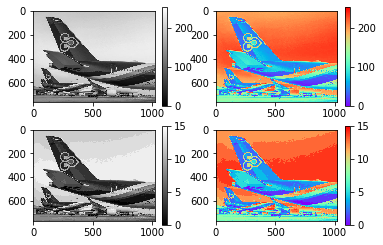

In [7]:
fig2 =plt.figure('Figure 2')
plt.subplot(2, 2, 1), plt.imshow(img_gray, 'gray'), plt.colorbar()
plt.subplot(2, 2, 2), plt.imshow(img_gray, 'rainbow'), plt.colorbar()
plt.subplot(2, 2, 3), plt.imshow(img_q4, 'gray'), plt.colorbar()
plt.subplot(2, 2, 4), plt.imshow(img_q4, 'rainbow'), plt.colorbar()

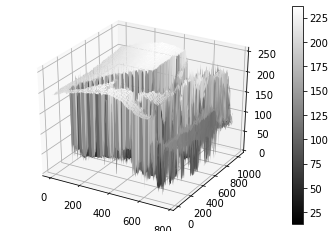

In [8]:
fig3 = plt.figure('Figure 3')

X, Y = np.mgrid[0:img_gray.shape[0], 0:img_gray.shape[1]]
ax = fig3.gca(projection='3d')

surf = ax.plot_surface(X, Y, img_gray , cmap=cm.gray)

fig3.colorbar(surf)